**Importeringar för Notebooken**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from math import sqrt
from statsmodels.stats.proportion import proportion_effectsize
from sklearn.linear_model import LinearRegression
from io_utils import *
from metrics import Metrics
from viz import *
from sklearn.decomposition import PCA




**Förebereder data**

In [2]:
"""
Snabb översikt av datan
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           800 non-null    int64  
 1   age          800 non-null    int64  
 2   sex          800 non-null    object 
 3   height       800 non-null    float64
 4   weight       800 non-null    float64
 5   systolic_bp  800 non-null    float64
 6   cholesterol  800 non-null    float64
 7   smoker       800 non-null    object 
 8   disease      800 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 56.4+ KB


**Beskrivande analys**
=======================

- Räkna ut medel, median, min och max för: age, weight, height, systolic_bp, cholesterol.
- Skapa minst 3 olika grafer (t.ex. histogram över blodtryck, boxplot över vikt per kön, stapeldiagram över andelen rökare).

In [3]:
"""
RÄKNA UT MEDEL,MEDIA, MIN & MAX  
"""

metrics_counter= Metrics(df)
columns = ["age", "weight", "height", "systolic_bp", "cholesterol"]
averages = metrics_counter.average(columns)
medians = metrics_counter.median(columns)
minimums = metrics_counter.minimum(columns) 
maximums = metrics_counter.maximum(columns)

summary = pd.DataFrame({
    "Average": averages,
    "Median": medians,
    "Minimum": minimums,
    "Maximum": maximums})

print(summary)



                Average  Median  Minimum  Maximum
age           49.426250   50.00     18.0    90.00
weight        73.413000   73.20     33.7   114.40
height       171.849250  171.35    144.4   200.40
systolic_bp  149.178625  149.40    106.8   185.90
cholesterol    4.929150    4.97      2.5     7.88


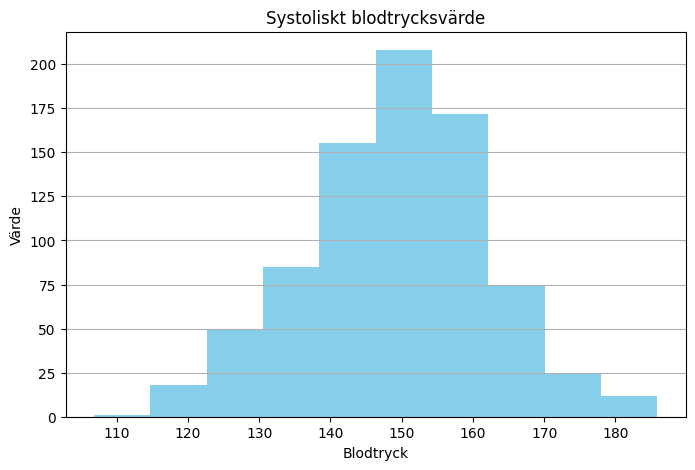

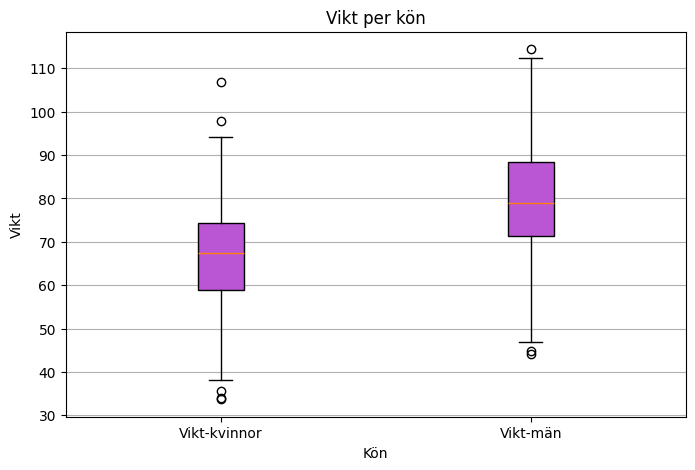

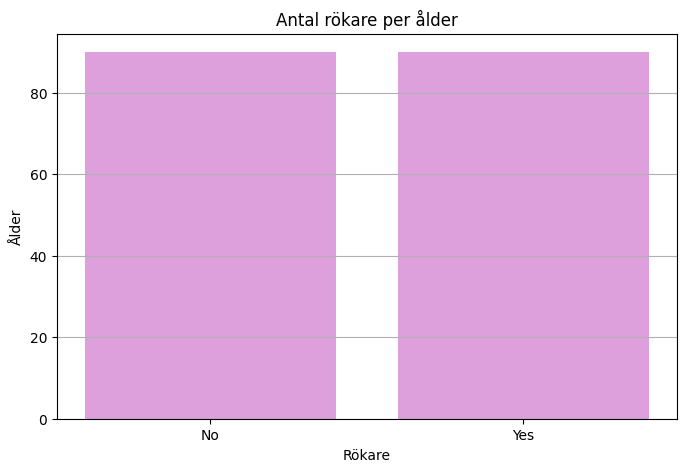

In [4]:
"""
SKAPA 3 OLIKA GRAFER
"""

# histogram över blodtryck
gb = GraphBuilder(title="Systoliskt blodtrycksvärde", xlabel="Blodtryck", ylabel="Värde")
gb.hist_plot(df.systolic_bp,bins=10, color="skyblue")

#boxplot över vikt per kön

vikt_kvinnor = df[df["sex"] == "F"]["weight"]
vikt_män = df[df["sex"] == "M"]["weight"]

gb = GraphBuilder(title="Vikt per kön", xlabel="Kön", ylabel="Vikt")
gb.box_plot([vikt_kvinnor, vikt_män], labels=["Vikt-kvinnor", "Vikt-män"], color="mediumorchid")

# stapeldiagram över andelen rökare
gb = GraphBuilder(title="Antal rökare per ålder", xlabel="Rökare", ylabel="Ålder")
gb.bar_plot(df.smoker,df.age, color="plum")


**Beskrivande analys - summering**

För att räkna ut medel, median, min och max använde jag lite av det vi gått igenom i "Python - #6 Listor" och försökte spara mig mödan att göra om varje ekvation(medel, median, min & max) för varje parameter genom att summera allt i en lista.
Skapade 3 grafer enligt instruktion:
- histogram över blodtryck, 
- boxplot över vikt per kön, 
- stapeldiagram över andelen rökare
Använde mig av instruktionerna i "Fördjupning i Matplotlib" videon för att kunna skapa sammansatta grafer. 

Metod tagen från:
"Python - #6 Listor" - https://youtu.be/cRSZ2sbgKHI?si=Zk3fVCXw8e5Jg6ej
"Python - #27 Fördjupning i Matplotlib" - https://youtu.be/miCWJK49lYI?si=7y9HLXFglK4p_2uP,
"Python - #30 Sampling och Variation" - https://youtu.be/AuXw6rq4CTs?si=171GVO_x5QgM-h8B









**Simulering kopplad till caset (använd numpy.random + seed)**
===========================================================================

- Beräkna andelen personer i datasetet som har sjukdomen.
- Använd numpy för att simulera 1000 slumpade personer med samma sannolikhet för sjukdom.
- Jämför den simulerade andelen med den verkliga andelen i datasetet.

Antal sjuka: 47 av 800
<bound method Simulator._beräkna_sannolikhet of <viz.Simulator object at 0x0000022158D53230>>
count    1000.000000
mean        0.056000
std         0.230037
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
dtype: float64


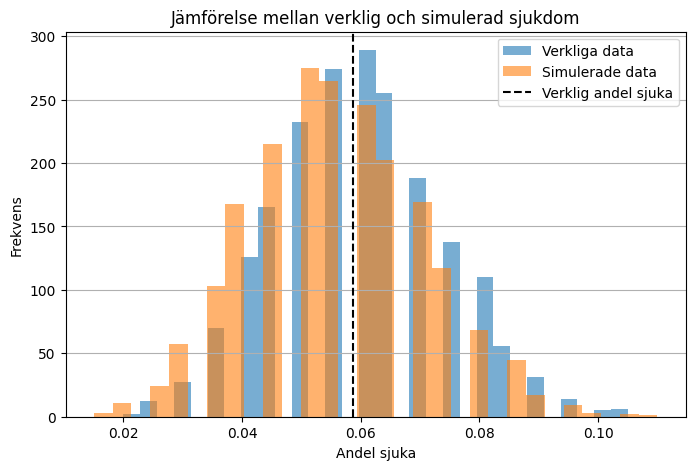

None


In [5]:
"""
Simulering
"""
#RÄKNA ANDEL SJUKA PERSONER I DF
sm = Simulator(df)
print(sm._beräkna_sannolikhet)

# #SIMULERA 1000 SLUMPADE PERSONER MED SAMMA SANNOLIKHET FÖR SJUKDOM
print(pd.Series(sm.simulerade_värden).describe())

#JÄMFÖR SIMULERADE ANDELEN MED DEN VERKLIGA ANDELEN

print(sm.jämför_simulering())


**Simulering - summering**

Den observerade andelen sjuka i datasetet var 47 personer av 800. Genom att simulera 1000 personer med samma sannolikhet fick jag en liknande andel sjuka så simuleringen lyckades återskapa dem verkliga siffrorna.
Vid upprepade stickprov från både verklig och simulerad var medelvärdena väldigt lika - vilket påvisar att simuleringen är representatitv. 
För att visualisera likheterna mellan verkliga siffror och simuleringen gjorde jag ett histogram som påvisar likheterna tydligare. 

Metod togs från "Python - #30 Sampling och Variation" https://youtu.be/AuXw6rq4CTs?si=9vW_V3WNI6gV5tTM





**Konfidensintervall**
==============================

- Beräkna ett konfidensintervall för medelvärdet av systolic_bp (t.ex. med normalapproximation eller bootstrap, som vi gått igenom på kursen).
- Beräkna konfidensintervallet med två olika metoder (t.ex. normalapproximation och bootstrap) och jämför resultaten.(för VG)


In [6]:
"""
Konfidensintervall
"""
#NORMAL CONFIDENCE INTERVAL

bp_medelvärdet = np.mean(df["systolic_bp"]) #Räkna ut medelvärdet/true mean av systolic_bp för jämförelse med stickprovet
bp_medelvärdet

n = 100
x = np.random.choice(df["systolic_bp"], size=n, replace=True) 

mean_x = float(np.mean(x)) 
s = float(np.std(x, ddof= 1)) 
se = s/np.sqrt(n)
mean_x,s,n,se

def ci_mean_normal(x, confidence=0.95):
    """
    95%-CI för medel med normal-approximation:
    medel +/- 1.96*(s/ sqrt(n))
    """
    x = np.asarray (x, dtype=float)
    mean_x = float(np.mean(x))
    s =float(np.std(x, ddof = 1))
    n = len(x)

    z_critical = 1.96 
    half_width = z_critical * s/ sqrt(n) 
    lo, hi = mean_x - half_width, mean_x + half_width 
    return lo, hi, mean_x, s, n

lo, hi, mean_x, s, n = ci_mean_normal(x)
(lo,hi), mean_x, s, n, bp_medelvärdet


((147.45687310557173, 152.2191268944283),
 149.83800000000002,
 12.148606604225952,
 100,
 np.float64(149.178625))

In [7]:
#BOOTSTRAP CONFIDENCE INTERVAL

def ci_mean_bootstrap(x, B=5000, confidence=0.95): 
    x = np.asarray(x, dtype=float) 
    n = len(x)
    boot_means = np.empty(B) 
    for b in range(B):
        boot_sample = np.random.choice(x, size=n, replace=True)
        boot_means[b] = np.mean(boot_sample)

    alpha = (1 - confidence) / 2 
    lo, hi = np.percentile(boot_means, [100*alpha, 100*(1-alpha)])
    return float(lo), float(hi), float(np.mean(x))

blo, bhi, bmean = ci_mean_bootstrap(x, B=3000)
(blo, bhi), bmean, bp_medelvärdet


((147.45497500000002, 152.21105), 149.83800000000002, np.float64(149.178625))

In [8]:
#COMPARING NORMAL & BOOTSTRAP CI

print("Normal-CI", (lo, hi))
print("Bootstrap-CI:",(blo, bhi))
print("Stickprovsmedel:", mean_x, " samt medel:", bp_medelvärdet)


Normal-CI (147.45687310557173, 152.2191268944283)
Bootstrap-CI: (147.45497500000002, 152.21105)
Stickprovsmedel: 149.83800000000002  samt medel: 149.178625


**Konfidensintervall - summering**



När vi jämför Normal och Bootstrapsmetodens konfidensintervall för stickprovets medelvärde är svaren väldigt nära. Det påvisar att även om populationen ligger på 800 så är datan inte skev nog att skapa någon diskrepans mellan dem olika metoderna. Men båda intervallen ligger under det sanna medelvärdet - 149.18 vilket innebär att stickproven underskattade det sanna medelvärdet. 

Metod togs från  "Python - #31 Konfidensintervall" https://youtu.be/xjYEYBvPaSc?si=F9146Fqwqh2qWmff samt https://www.geeksforgeeks.org/dsa/confidence-interval/

**Hypotesprövning**
==============================

- Testa hypotesen: ”Rökare har högre medel-blodtryck än icke-rökare.”
- Använd en av metoderna vi gått igenom (t.ex. bootstrap eller enkel t-test-funktion).
- Förklara kort resultatet i en markdown-ruta.
- Gör en simulering för att undersöka hur säkert ditt hypotes­test är (t.ex. hur ofta testet hittar en skillnad när den finns → power).

In [9]:
"""
HYPOTESPRÖVNING
"""

#smokers kategorin är kategorisk vilket inte funkar i ett t-test så delar upp detta i 2 listor - rökare + icke-rökare enligt bp så värdena är nu numeriska.

bp_smokers = df[df["smoker"] == "Yes"]["systolic_bp"]
bp_nonsmokers = df[df["smoker"] == "No"]["systolic_bp"]

#STANDARD T-TEST

t_stat, p_val = stats.ttest_ind(bp_smokers, bp_nonsmokers, equal_var=True )

#WELCH T-TEST

t_stat_w, p_val = stats.ttest_ind(bp_smokers, bp_nonsmokers, equal_var=False )

print(f"Standard t-test: t = {t_stat:.3f}, p = {p_val:.4f}")
print(f"Welch t-test: t = {t_stat_w:.3f}, p = {p_val:.4f}")

#BOOTSTRAP TEST

np.random.seed(123)

n_boot = 10_000
obs_diff = bp_nonsmokers.mean() - bp_smokers.mean()

boot_diffs = np.empty(n_boot)
for i in range (n_boot):
    A_star = np.random.choice(bp_smokers, size=len(bp_smokers), replace=True)
    B_star = np.random.choice(bp_nonsmokers, size=len(bp_nonsmokers), replace=True)
    boot_diffs[i] = B_star.mean() - A_star.mean()

p_boot = np.mean(np.abs(boot_diffs) <= obs_diff)

ci_low, ci_high = np.percentile(boot_diffs, [2.5, 97.5])

print(obs_diff)
print(p_boot)
print((ci_low, ci_high))



Standard t-test: t = 0.461, p = 0.6527
Welch t-test: t = 0.450, p = 0.6527
-0.47190136846063524
0.0
(np.float64(-2.534898465180659), np.float64(1.5934035359230787))


In [10]:
#GÖR EN SIMULERING FÖR ATT UNDERSÖKA HUR SÄKERT DITT HYPOTEST ÄR

np.random.seed(42)

baseline_rate_A = 0.25

min_detectable_diff_pp = 2.0
min_detectable_diff = min_detectable_diff_pp/ 100.0

target_rate_B = baseline_rate_A + min_detectable_diff

alpha = 0.05
power_target = 0.80


effect_size = proportion_effectsize(prop1 = baseline_rate_A, prop2 = target_rate_B)


bp_smokers_mean = df[df["smoker"] == "Yes"]["systolic_bp"].mean()
bp_nonsmokers_mean = df[df["smoker"] == "No"]["systolic_bp"].mean()
sd_pooled = np.sqrt((df[df["smoker"] == "Yes"]["systolic_bp"].std(ddof=1)**2 + 
                     df[df["smoker"] == "No"]["systolic_bp"].std(ddof=1)**2)/2)


def simulate_power_ttest(bp_nonsmokers_mean, bp_smokers_mean, sd, n, alpha=0.05, n_sims=5000):
    rejections = 0
    for _ in range(n_sims):
        A = np.random.normal(bp_nonsmokers_mean, sd, size=n)
        B = np.random.normal(bp_smokers_mean, sd, size=n)
        _, p_val = stats.ttest_ind(A,B, equal_var=False)
        rejections += (p_val < alpha)
    return rejections/n_sims

sim_power = simulate_power_ttest(bp_nonsmokers_mean, bp_smokers_mean, sd=sd_pooled, n=100, alpha=alpha, n_sims=3000)
sim_power


np.float64(0.06366666666666666)

**Hypotesprövning - summering**

För att testa hypotesen: ”Rökare har högre medel-blodtryck än icke-rökare” använde jag tre olika statistiska metoder - t-test,  welch t-test och bootstrap för att kunna se skillnaden i svaren och jämföra dem:
- Standard t-test: t = 0.461, p = 0.6527 
- Welch t-test: t = 0.450, p = 0.6527
Båda t-testerna visar en signifikant skillnad - att icke-rökare nog har lägre medelblodtryck än rökare - vilket stödjer teorin.
- Bootstrap testet var nog det bästa valet för att testa hypotesen då det är ett mer robust test som inte kräver antaganden om normalfördelning eller lika varians. För det testet fick vi följande svar:
    - Observerad skillnad i medelvärde: -0.47190136846063524 - den observerade skillnaden i medelvärde mellan icke-rökare och rökare är -0.472 villket innebär att rökare har högre blodtryck.
    - p-boot: 0.0 - ingen av de 10 000 bootstrap-skillnaderna var lika extrema som den observerade skillnaden - starkt stöd för hypotesen.
    - ci: (-2.534898465180659, 1.5934035359230787) - Eftersom intervallet innehåller noll kan vi inte med 95% säkerhet säga att skillnaden är statistiskt signifikant.

Alla tre metoderna lutar mot att rökare har ett högre medelblodtryck än icke-rökare -> vilket stödjer hypotesen.

Simulering av power för t-test: 
För att undersöka testets säkerhet simulerades 3000 A/B-tester. Resultatet visade att testet har en power på 0.0636, vilket innebär att det i 6.37 % av fallen korrekt upptäcker en verklig skillnad. Detta är långt under det rekommenderade värdet på 0.80 Det innebär att mitt test är osäkert - det missar den verkliga skillnaden i över 93% av fallen. 


Metod togs från:
 "Python - #32 Hypotesprövning" - https://youtu.be/jfBuCNus-HY?si=BejuaW0nHLzxe64T
"Python - #36 Power & Flerfaldig testning" - https://youtu.be/fmEk4L9IlA8?si=fVKITd1jxDP8TAqt


**Linjär algebra i praktiken**
==============================


- Använd numpy eller scikit-learn för en analys som bygger på matriser/vektorer.
Exempel: En enkel linjär regression för att förutsäga blodtryck från ålder och vikt.
- PCA för att hitta mönster i datan.


In [11]:
"""
Linjär regression för att förutsäga blodtryck från ålder och vikt med scikit-learn
"""

x_2d = df[["age", "weight"]].values 
y_1d = df["systolic_bp"].values

pca = PCA(n_components=1) # reducerar ålder och vikt till en enda kombinerad komponent.
x_pca = pca.fit_transform(x_2d)

linreg = LinearRegression()
linreg.fit(x_pca, y_1d)

sk_intercept = float(linreg.intercept_)
sk_slope = float(linreg.coef_[0]) #slope from the fitted regression model as I cannot use x_pca being a dataset.
sk_r2 = float(linreg.score(x_pca,y_1d))

sample_20 = pca.transform(np.array([[20.0, 60.0]]))
sample_30 = pca.transform(np.array([[30.0, 60.0]]))
sample_50 = pca.transform(np.array([[50.0, 60.0]]))

sk_pred_20 = float(linreg.predict(sample_20)[0]) # prognos för ålder 20 med 60 kg vikt
sk_pred_30 = float(linreg.predict(sample_30)[0]) # prognos för ålder 30 med 60 kg vikt
sk_pred_50 = float(linreg.predict(sample_50)[0]) # prognos för ålder 50 med 60 kg vikt

print (f"""
sklearn:
    intercept = {sk_intercept:.2f}
    slope = {sk_slope:.2f}
    R^2 = {sk_r2:.3f}
    prognos vid 20 års ålder m. 60 kg vikt = {sk_pred_20:.1f}   
    prognos vid 30 års ålder m. 60 kg vikt = {sk_pred_30:.1f}   
    prognos vid 50 års ålder m. 60 kg vikt = {sk_pred_50:.1f}      
       """)


sklearn:
    intercept = 149.18
    slope = 0.51
    R^2 = 0.332
    prognos vid 20 års ålder m. 60 kg vikt = 135.4   
    prognos vid 30 års ålder m. 60 kg vikt = 140.4   
    prognos vid 50 års ålder m. 60 kg vikt = 150.5      
       


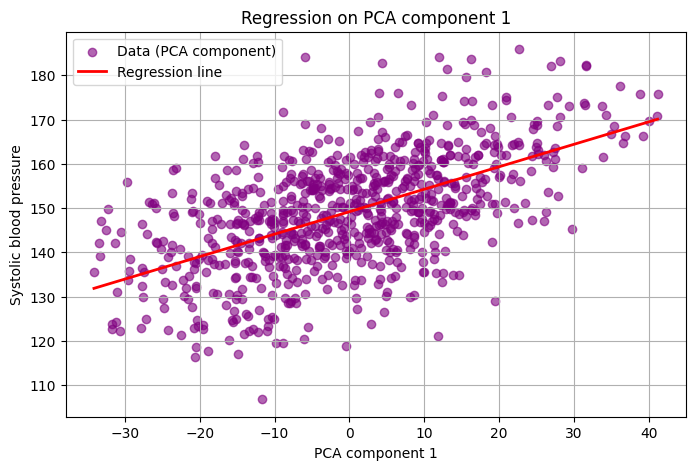

In [12]:
"""
Linjär regression graf: blodtryck förutsagt enligt ålder & vikt - PCA 
"""

# Scatter of PCA component vs blood pressure
plt.figure(figsize=(8,5))
plt.scatter(x_pca, y_1d, alpha=0.6, label="Data (PCA component)", color="purple")

# Regression line
x_line = np.linspace(x_pca.min(), x_pca.max(), 200).reshape(-1,1)
y_line = linreg.predict(x_line)
plt.plot(x_line, y_line, color="red", linewidth=2, label="Regression line")

# Labels and legend
plt.title("Regression on PCA component 1")
plt.xlabel("PCA component 1")
plt.ylabel("Systolic blood pressure")
plt.legend()
plt.grid(True)
plt.show()

**Linjär algebra i praktiken - summering**

Valde att utföra den linjera regressionen med en färdig klass från sklearn - Linear Regression - vilket innebär mindre manuel kodning.
Eftersom jag använde mig av 2 x-variabler - ålder och vikt - valde jag att kombinera dem till enda komponent via PCA. Detta är användbart för att skapa en nekel model men problemet är dock att man kan förlora tolkningsbarhet (är det vikt/ålder som orsakar sambandet?). 

För att tydliggöra sambandet mellan blodtryck och vikt/ålder skapade jag en scatter graf som visar tydligt att det finns ett tydligt linjärt samband mellan blodtryck och dem kombinerade faktorerna. Ju högre värde på PCA-komponenten, desto högre förväntat blodtryck. Detta tyder på att både ålder och vikt samverkar till att påverka blodtrycket, men eftersom PCA används går det inte att särskilja deras individuella effekter.


Metod togs från: "Python - #38 Linjär Regression" - https://youtu.be/ZsJ-DbKpD3s?si=Qg_YcrUZmkeM6deT, 
https://www.geeksforgeeks.org/data-analysis/principal-component-analysis-pca/, 
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html